## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  59.177764  1265.047431  0.969362  6.408186  1.581944
1  84.795224  1536.009712  0.988761  6.356551  1.329390
2  92.556932   731.368170  0.441275  3.346294  1.381756
3  45.766106   867.281351  0.905566  3.866795  1.353493
4  35.357895   735.958366  0.065980  2.733309  1.053672


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0390843	total: 69.2ms	remaining: 1m 9s
1:	learn: 1.0315767	total: 69.7ms	remaining: 34.8s
2:	learn: 1.0227432	total: 70.3ms	remaining: 23.4s
3:	learn: 1.0150600	total: 70.7ms	remaining: 17.6s
4:	learn: 1.0064743	total: 71.3ms	remaining: 14.2s
5:	learn: 0.9994383	total: 71.9ms	remaining: 11.9s
6:	learn: 0.9899395	total: 72.4ms	remaining: 10.3s
7:	learn: 0.9809544	total: 72.9ms	remaining: 9.04s
8:	learn: 0.9728406	total: 73.5ms	remaining: 8.1s
9:	learn: 0.9628518	total: 74ms	remaining: 7.33s
10:	learn: 0.9569109	total: 74.5ms	remaining: 6.7s
11:	learn: 0.9488852	total: 75.1ms	remaining: 6.19s
12:	learn: 0.9426887	total: 75.6ms	remaining: 5.74s
13:	learn: 0.9352587	total: 76ms	remaining: 5.35s
14:	learn: 0.9287390	total: 76.5ms	remaining: 5.02s
15:	learn: 0.9211334	total: 76.9ms	remaining: 4.73s
16:	learn: 0.9141237	total: 77.3ms	remaining: 4.47s
17:	learn: 0.9057975	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8995002	total: 78.3ms	remaining: 4.04

91:	learn: 0.5226652	total: 109ms	remaining: 1.08s
92:	learn: 0.5196634	total: 110ms	remaining: 1.07s
93:	learn: 0.5163099	total: 111ms	remaining: 1.07s
94:	learn: 0.5136380	total: 111ms	remaining: 1.06s
95:	learn: 0.5098101	total: 111ms	remaining: 1.05s
96:	learn: 0.5064766	total: 112ms	remaining: 1.04s
97:	learn: 0.5031523	total: 112ms	remaining: 1.03s
98:	learn: 0.4997860	total: 112ms	remaining: 1.02s
99:	learn: 0.4965935	total: 113ms	remaining: 1.01s
100:	learn: 0.4931541	total: 113ms	remaining: 1s
101:	learn: 0.4902191	total: 113ms	remaining: 997ms
102:	learn: 0.4871399	total: 114ms	remaining: 991ms
103:	learn: 0.4842414	total: 114ms	remaining: 985ms
104:	learn: 0.4814404	total: 115ms	remaining: 978ms
105:	learn: 0.4788363	total: 115ms	remaining: 971ms
106:	learn: 0.4753877	total: 115ms	remaining: 963ms
107:	learn: 0.4727151	total: 116ms	remaining: 957ms
108:	learn: 0.4704891	total: 116ms	remaining: 951ms
109:	learn: 0.4679719	total: 117ms	remaining: 946ms
110:	learn: 0.4650513	to

269:	learn: 0.2346645	total: 186ms	remaining: 504ms
270:	learn: 0.2341830	total: 187ms	remaining: 503ms
271:	learn: 0.2337981	total: 188ms	remaining: 502ms
272:	learn: 0.2329274	total: 188ms	remaining: 501ms
273:	learn: 0.2325845	total: 188ms	remaining: 499ms
274:	learn: 0.2319303	total: 189ms	remaining: 498ms
275:	learn: 0.2316046	total: 189ms	remaining: 497ms
276:	learn: 0.2311322	total: 190ms	remaining: 496ms
277:	learn: 0.2303184	total: 190ms	remaining: 494ms
278:	learn: 0.2291108	total: 191ms	remaining: 493ms
279:	learn: 0.2281489	total: 191ms	remaining: 492ms
280:	learn: 0.2277753	total: 192ms	remaining: 491ms
281:	learn: 0.2272995	total: 192ms	remaining: 489ms
282:	learn: 0.2263607	total: 193ms	remaining: 488ms
283:	learn: 0.2260119	total: 193ms	remaining: 487ms
284:	learn: 0.2256261	total: 194ms	remaining: 486ms
285:	learn: 0.2247149	total: 194ms	remaining: 484ms
286:	learn: 0.2240127	total: 194ms	remaining: 483ms
287:	learn: 0.2233876	total: 195ms	remaining: 482ms
288:	learn: 

507:	learn: 0.1160263	total: 292ms	remaining: 282ms
508:	learn: 0.1159218	total: 292ms	remaining: 282ms
509:	learn: 0.1158189	total: 293ms	remaining: 281ms
510:	learn: 0.1156892	total: 293ms	remaining: 280ms
511:	learn: 0.1155892	total: 293ms	remaining: 280ms
512:	learn: 0.1150620	total: 294ms	remaining: 279ms
513:	learn: 0.1149632	total: 295ms	remaining: 279ms
514:	learn: 0.1144853	total: 295ms	remaining: 278ms
515:	learn: 0.1143604	total: 296ms	remaining: 277ms
516:	learn: 0.1142648	total: 296ms	remaining: 277ms
517:	learn: 0.1141707	total: 296ms	remaining: 276ms
518:	learn: 0.1137285	total: 297ms	remaining: 275ms
519:	learn: 0.1136362	total: 297ms	remaining: 274ms
520:	learn: 0.1135704	total: 298ms	remaining: 274ms
521:	learn: 0.1134524	total: 298ms	remaining: 273ms
522:	learn: 0.1130190	total: 299ms	remaining: 272ms
523:	learn: 0.1129303	total: 299ms	remaining: 272ms
524:	learn: 0.1128666	total: 300ms	remaining: 271ms
525:	learn: 0.1128036	total: 300ms	remaining: 270ms
526:	learn: 

681:	learn: 0.0765123	total: 368ms	remaining: 172ms
682:	learn: 0.0764792	total: 369ms	remaining: 171ms
683:	learn: 0.0763886	total: 369ms	remaining: 171ms
684:	learn: 0.0763558	total: 370ms	remaining: 170ms
685:	learn: 0.0762663	total: 370ms	remaining: 169ms
686:	learn: 0.0758083	total: 371ms	remaining: 169ms
687:	learn: 0.0757204	total: 371ms	remaining: 168ms
688:	learn: 0.0756877	total: 371ms	remaining: 168ms
689:	learn: 0.0756009	total: 372ms	remaining: 167ms
690:	learn: 0.0753441	total: 372ms	remaining: 166ms
691:	learn: 0.0750728	total: 373ms	remaining: 166ms
692:	learn: 0.0747424	total: 373ms	remaining: 165ms
693:	learn: 0.0746572	total: 373ms	remaining: 165ms
694:	learn: 0.0746245	total: 374ms	remaining: 164ms
695:	learn: 0.0745402	total: 374ms	remaining: 163ms
696:	learn: 0.0742094	total: 375ms	remaining: 163ms
697:	learn: 0.0741771	total: 375ms	remaining: 162ms
698:	learn: 0.0738550	total: 375ms	remaining: 162ms
699:	learn: 0.0738230	total: 376ms	remaining: 161ms
700:	learn: 

930:	learn: 0.0433990	total: 473ms	remaining: 35.1ms
931:	learn: 0.0432448	total: 474ms	remaining: 34.6ms
932:	learn: 0.0430795	total: 474ms	remaining: 34.1ms
933:	learn: 0.0429362	total: 475ms	remaining: 33.5ms
934:	learn: 0.0427380	total: 475ms	remaining: 33ms
935:	learn: 0.0426169	total: 476ms	remaining: 32.5ms
936:	learn: 0.0424911	total: 476ms	remaining: 32ms
937:	learn: 0.0422984	total: 476ms	remaining: 31.5ms
938:	learn: 0.0422188	total: 477ms	remaining: 31ms
939:	learn: 0.0421403	total: 477ms	remaining: 30.5ms
940:	learn: 0.0419942	total: 478ms	remaining: 30ms
941:	learn: 0.0419047	total: 478ms	remaining: 29.4ms
942:	learn: 0.0418276	total: 478ms	remaining: 28.9ms
943:	learn: 0.0417516	total: 479ms	remaining: 28.4ms
944:	learn: 0.0415302	total: 479ms	remaining: 27.9ms
945:	learn: 0.0413602	total: 480ms	remaining: 27.4ms
946:	learn: 0.0412249	total: 480ms	remaining: 26.9ms
947:	learn: 0.0411557	total: 481ms	remaining: 26.4ms
948:	learn: 0.0410486	total: 481ms	remaining: 25.8ms
9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

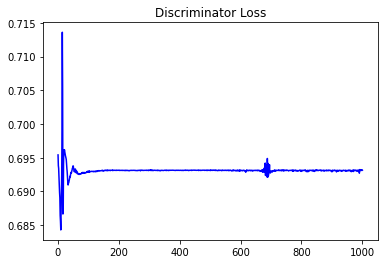

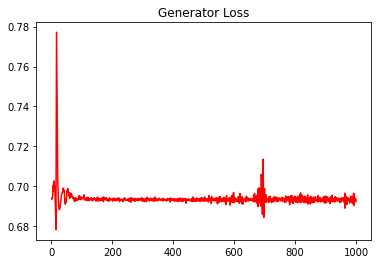

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1693810014892795


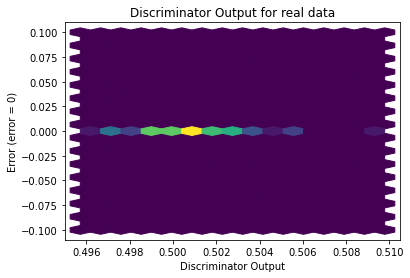

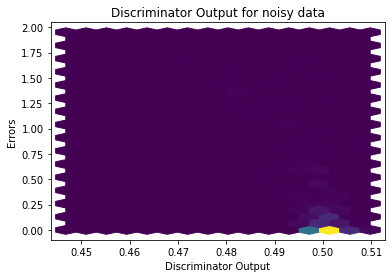

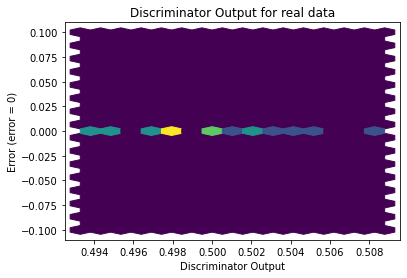

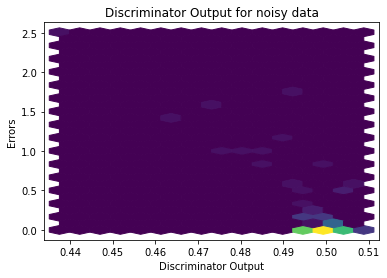

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


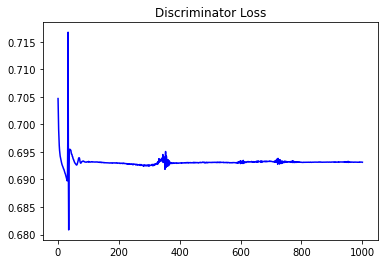

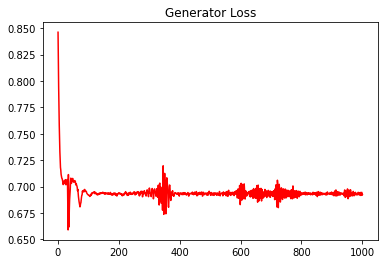

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.16811621812898356


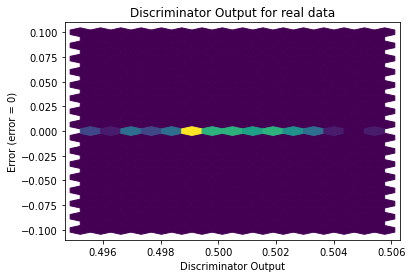

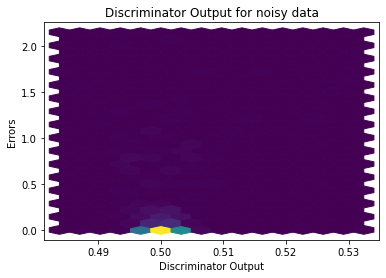

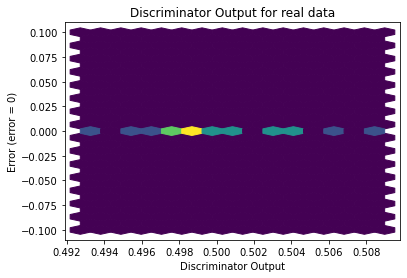

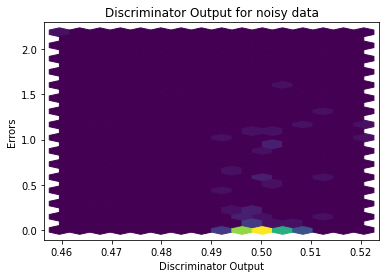

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0389]], requires_grad=True)
